# EC - COVID-19 India Matplotlib Overview (Updated Daily)
> Tracking coronavirus total cases, deaths and new cases in India

- branch: master
- badges: true
- comments: true
- author: PrasannaDK
- categories: [fastpages, jupyter]
- date: 2020-08-08

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
#import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
from datetime import datetime
%matplotlib inline

In [2]:
#hide
#httpRequest = requests.get('https://api.covid19india.org/csv/latest/state_wise.csv')
#httpResponse = httpRequest.content
#httpResponse
# csv_file = open('data/downloaded_Snapshot.csv', 'wb')
# csv_file.write(httpResponse)
# csv_file.close()
# dft_downloaded = pd.read_csv('data/downloaded_Snapshot.csv', 'wb')

In [3]:
#hide
#Getting Json Data
httpRequest = requests.get('https://api.covid19india.org/states_daily.json')

In [4]:
#hide
httpResponse = httpRequest.json()
httpResponse['states_daily'][-1:-4:-1]
#Contains daily counts for all states as individual properties

[{'an': '0',
  'ap': '80',
  'ar': '0',
  'as': '6',
  'br': '21',
  'ch': '0',
  'ct': '3',
  'date': '10-Aug-20',
  'dd': '0',
  'dl': '20',
  'dn': '0',
  'ga': '5',
  'gj': '20',
  'hp': '1',
  'hr': '6',
  'jh': '12',
  'jk': '6',
  'ka': '114',
  'kl': '7',
  'la': '0',
  'ld': '0',
  'mh': '293',
  'ml': '0',
  'mn': '0',
  'mp': '19',
  'mz': '0',
  'nl': '0',
  'or': '16',
  'pb': '18',
  'py': '2',
  'rj': '11',
  'sk': '0',
  'status': 'Deceased',
  'tg': '10',
  'tn': '114',
  'tr': '1',
  'tt': '886',
  'un': '0',
  'up': '51',
  'ut': '9',
  'wb': '41'},
 {'an': '61',
  'ap': '6924',
  'ar': '110',
  'as': '1261',
  'br': '2824',
  'ch': '100',
  'ct': '208',
  'date': '10-Aug-20',
  'dd': '0',
  'dl': '1070',
  'dn': '50',
  'ga': '213',
  'gj': '1138',
  'hp': '24',
  'hr': '711',
  'jh': '750',
  'jk': '372',
  'ka': '5218',
  'kl': '784',
  'la': '15',
  'ld': '0',
  'mh': '6711',
  'ml': '8',
  'mn': '78',
  'mp': '654',
  'mz': '25',
  'nl': '69',
  'or': '1236',
  

In [5]:
#hide
raw_json = httpResponse['states_daily'].copy()
raw_json[0]

{'an': '0',
 'ap': '1',
 'ar': '0',
 'as': '0',
 'br': '0',
 'ch': '0',
 'ct': '0',
 'date': '14-Mar-20',
 'dd': '0',
 'dl': '7',
 'dn': '0',
 'ga': '0',
 'gj': '0',
 'hp': '0',
 'hr': '14',
 'jh': '0',
 'jk': '2',
 'ka': '6',
 'kl': '19',
 'la': '0',
 'ld': '0',
 'mh': '14',
 'ml': '0',
 'mn': '0',
 'mp': '0',
 'mz': '0',
 'nl': '0',
 'or': '0',
 'pb': '1',
 'py': '0',
 'rj': '3',
 'sk': '0',
 'status': 'Confirmed',
 'tg': '1',
 'tn': '1',
 'tr': '0',
 'tt': '81',
 'un': '0',
 'up': '12',
 'ut': '0',
 'wb': '0'}

In [6]:
#hide
dt_today = raw_json[-1]['date']    #Getting the Latest day from the downloaded json
dt_yday = raw_json[-4]['date']    #And Getting the Previous day
dt_today, dt_yday

('10-Aug-20', '09-Aug-20')

In [7]:
#hide
#Generating a Pandas Dataframe from the Json Object
dft_cases, dft_deaths = pd.DataFrame(), pd.DataFrame()
for i in range(0, len(raw_json)):
    jsonObj = raw_json[i]
    date = jsonObj.pop('date', 'None')
    status = jsonObj.pop('status', 'None')
    del jsonObj['tt']
    dft = pd.DataFrame(data = jsonObj.values(), index = jsonObj.keys(), columns = [date], dtype=np.int64) 
    if status == 'Confirmed':
        #print('conf')
        dft_cases = pd.concat([dft_cases, dft], axis=1)
    elif status == 'Deceased':
        dft_deaths = pd.concat([dft_deaths, dft], axis=1)
dft_cases.head(), dft_deaths.head()        

(    14-Mar-20  15-Mar-20  16-Mar-20  17-Mar-20  18-Mar-20  19-Mar-20  \
 an          0          0          0          0          0          0   
 ap          1          0          0          0          0          2   
 ar          0          0          0          0          0          0   
 as          0          0          0          0          0          0   
 br          0          0          0          0          0          0   
 
     20-Mar-20  21-Mar-20  22-Mar-20  23-Mar-20  ...  01-Aug-20  02-Aug-20  \
 an          0          0          0          0  ...         88         98   
 ap          0          2          1          1  ...       9276       8555   
 ar          0          0          0          0  ...         83         24   
 as          0          0          0          0  ...       1457       1178   
 br          0          0          2          1  ...       3521       2762   
 
     03-Aug-20  04-Aug-20  05-Aug-20  06-Aug-20  07-Aug-20  08-Aug-20  \
 an         96   

In [8]:
#hide
#Creating a cumulative table
dft_cases = dft_cases.cumsum(axis = 1, skipna = True)
dft_cases

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20,09-Aug-20,10-Aug-20
an,0,0,0,0,0,0,0,0,0,0,...,632,730,826,924,1023,1119,1218,1347,1486,1621
ap,1,1,1,1,1,3,3,5,6,7,...,150209,158764,166586,176333,186461,196789,206960,217040,227860,235525
ar,0,0,0,0,0,0,0,0,0,0,...,1674,1698,1758,1790,1855,1948,2049,2117,2155,2231
as,0,0,0,0,0,0,0,0,0,0,...,41625,42803,45174,48060,50344,52716,55395,57613,58736,61636
br,0,0,0,0,0,0,0,0,2,3,...,54508,57270,59567,62031,64732,68148,71794,75786,79720,82741
ch,0,0,0,0,0,1,5,5,6,7,...,1079,1117,1160,1206,1270,1327,1374,1426,1515,1595
ct,0,0,0,0,0,1,1,1,1,1,...,9427,9608,9820,10202,10497,11020,11408,11855,12148,12625
dd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dl,7,7,7,8,10,14,20,27,27,30,...,136716,137677,138482,139156,140232,141531,142723,144127,145427,146134
dn,0,0,0,0,0,0,0,0,0,0,...,1196,1251,1286,1329,1374,1417,1461,1512,1557,1619


In [9]:
#hide
dft_deaths = dft_deaths.cumsum(axis = 1, skipna = True)
dft_deaths

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20,09-Aug-20,10-Aug-20
an,0,0,0,0,0,0,0,0,0,0,...,7,8,10,12,14,16,19,20,20,20
ap,0,0,0,0,0,0,0,0,0,0,...,1407,1474,1537,1604,1681,1753,1842,1939,2036,2116
ar,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
as,0,0,0,0,0,0,0,0,0,0,...,105,109,113,119,125,130,136,144,149,155
br,0,0,0,0,0,0,0,0,1,1,...,312,322,336,349,369,388,400,419,429,450
ch,0,0,0,0,0,0,0,0,0,0,...,18,19,19,20,20,20,23,24,25,25
ct,0,0,0,0,0,0,0,0,0,0,...,55,58,61,69,71,77,87,90,96,99
dd,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dl,1,1,1,1,1,1,1,1,1,1,...,3989,4004,4021,4033,4044,4059,4082,4098,4111,4131
dn,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [10]:
#hide
dft_cases = dft_cases.reset_index().rename(columns={'index':'states'})
dft_deaths = dft_deaths.reset_index().rename(columns={'index':'states'})
dft_cases, dft_deaths

(   states  14-Mar-20  15-Mar-20  16-Mar-20  17-Mar-20  18-Mar-20  19-Mar-20  \
 0      an          0          0          0          0          0          0   
 1      ap          1          1          1          1          1          3   
 2      ar          0          0          0          0          0          0   
 3      as          0          0          0          0          0          0   
 4      br          0          0          0          0          0          0   
 5      ch          0          0          0          0          0          1   
 6      ct          0          0          0          0          0          1   
 7      dd          0          0          0          0          0          0   
 8      dl          7          7          7          8         10         14   
 9      dn          0          0          0          0          0          0   
 10     ga          0          0          0          0          0          0   
 11     gj          0          0        

In [11]:
#hide
dft_cases_old = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths_old = pd.read_csv('data/SnapshotDeaths-28-July.csv')

In [12]:
#hide
dft_cases_old.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,199,203,208,217,236,255,286,314,334,359
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,49650,53724,58668,64713,72711,80858,88671,96298,102349,110297
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,740,790,858,949,991,1056,1126,1158,1239,1330
3,Assam,0,0,0,0,0,0,0,0,0,...,23898,24991,26671,27643,28690,29820,30985,32127,33475,34846
4,Bihar,0,0,0,0,0,0,0,0,2,...,26379,27455,28564,30066,31691,33511,36314,38919,41111,43591


In [13]:
#hide
dft_deaths_old.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,19-Jul-20,20-Jul-20,21-Jul-20,22-Jul-20,23-Jul-20,24-Jul-20,25-Jul-20,26-Jul-20,27-Jul-20,28-Jul-20
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,Andhra Pradesh,0,0,0,0,0,0,0,0,0,...,642,696,758,823,884,933,985,1041,1090,1148
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,Assam,0,0,0,0,0,0,0,0,0,...,61,62,68,70,74,80,81,83,90,92
4,Bihar,0,0,0,0,0,0,0,0,1,...,179,187,198,208,212,221,232,249,255,269


In [14]:
#hide
dt_today_old = '28-Jul-20'
dt_yday_old = '27-Jul-20'

In [15]:
#hide
#Comparing to previous (given) data to ensure correctness

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases_old = dft_cases_old.groupby('states')[dt_today_old].sum()
dfc_deaths_old = dft_deaths_old.groupby('states')[dt_today_old].sum()
dfp_cases_old = dft_cases_old.groupby('states')[dt_yday_old].sum()
dfp_deaths_old = dft_deaths_old.groupby('states')[dt_yday_old].sum()

dfc_cases = dft_cases.groupby('states')[dt_today_old].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today_old].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday_old].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday_old].sum()

In [16]:
#hide
dfc_cases, dfc_cases_old    #It seems to be the same

(states
 an       359
 ap    110297
 ar      1330
 as     34846
 br     43591
 ch       934
 ct      8286
 dd         0
 dl    132275
 dn      1032
 ga      5287
 gj     57982
 hp      2330
 hr     32876
 jh      9563
 jk     18879
 ka    107001
 kl     20895
 la      1327
 ld         0
 mh    391440
 ml       779
 mn      2317
 mp     29217
 mz       384
 nl      1460
 or     28107
 pb     14378
 py      3013
 rj     38636
 sk       592
 tg     57142
 tn    227688
 tr      4287
 un         0
 up     73951
 ut      6587
 wb     62964
 Name: 28-Jul-20, dtype: int64,
 states
 Andaman and Nicobar Islands       359
 Andhra Pradesh                 110297
 Arunachal Pradesh                1330
 Assam                           34846
 Bihar                           43591
 Chandigarh                        934
 Daman and Diu                       0
 Delhi                          132275
 Goa                              5287
 Gujarat                         57982
 Haryana                      

In [17]:
#hide
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [18]:
#hide
dfc_cases_series = pd.Series(dfc_cases, name="Cases")
dfc_deaths_series = pd.Series(dfc_deaths, name="Deaths")
dfp_cases_series = pd.Series(dfp_cases, name="PCases")
dfp_deaths_series = pd.Series(dfp_deaths, name="PDeaths")
df_table = pd.concat([dfc_cases_series, dfc_deaths_series, dfp_cases_series, dfp_deaths_series], axis=1)
df_table.head()

,Cases,Deaths,PCases,PDeaths
states,,,,
an,1621,20,1486,20
ap,235525,2116,227860,2036
ar,2231,3,2155,3
as,61636,155,58736,149
br,82741,450,79720,429


In [19]:
#hide
df_table.sort_values(by = ['Cases','Deaths'], ascending = [False, False], inplace=True)
df_table.head()

,Cases,Deaths,PCases,PDeaths
states,,,,
mh,524513,18049,515332,17756
tn,302815,5041,296901,4927
ap,235525,2116,227860,2036
ka,182354,3319,178087,3205
dl,146134,4131,145427,4111


In [20]:
#hide
df_table.reset_index(inplace=True)
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,mh,524513,18049,515332,17756
1,tn,302815,5041,296901,4927
2,ap,235525,2116,227860,2036
3,ka,182354,3319,178087,3205
4,dl,146134,4131,145427,4111


In [21]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [22]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,mh,524513,18049,515332,17756,9181,293,3.44
1,tn,302815,5041,296901,4927,5914,114,1.66
2,ap,235525,2116,227860,2036,7665,80,0.90
3,ka,182354,3319,178087,3205,4267,114,1.82
4,dl,146134,4131,145427,4111,707,20,2.83


In [23]:
#hide
summary = dict()
summary['updated'] = datetime.now().strftime("%d-%b-%Y (%H:%M)")
summary['since'] = dt_yday
summary

{'updated': '11-Aug-2020 (00:31)', 'since': '09-Aug-20'}

In [24]:
#hide
df_table_mod = df_table.drop(['states', 'Fatality Rate'], axis = 1)
df_table_mod.head()

,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+)
0,524513,18049,515332,17756,9181,293
1,302815,5041,296901,4927,5914,114
2,235525,2116,227860,2036,7665,80
3,182354,3319,178087,3205,4267,114
4,146134,4131,145427,4111,707,20


In [25]:
#hide
for col_names, col_values in df_table_mod.iteritems():
    #print(col_names, col_values)
    summary[col_names] = col_values.sum()
summary

{'updated': '11-Aug-2020 (00:31)',
 'since': '09-Aug-20',
 'Cases': 2267064,
 'Deaths': 45364,
 'PCases': 2214048,
 'PDeaths': 44478,
 'Cases (+)': 53016,
 'Deaths (+)': 886}

In [26]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [27]:
#hide
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

In [28]:
#hide
dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_today, ascending = False,inplace = True)

In [29]:
#hide_input
display(html)

{% cite covid19indiaorg2020tracker %}

In [30]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,01-Aug-20,02-Aug-20,03-Aug-20,04-Aug-20,05-Aug-20,06-Aug-20,07-Aug-20,08-Aug-20,09-Aug-20,10-Aug-20
states,,,,,,,,,,,,,,,,,,,,,
mh,0,18,6,3,3,4,4,12,10,23,...,9601,9509,8968,7760,10309,11514,10483,12822,12248,9181
ap,0,0,0,0,0,2,0,2,1,1,...,9276,8555,7822,9747,10128,10328,10171,10080,10820,7665
tn,0,0,0,0,1,1,0,3,3,3,...,5879,5875,5609,5063,5175,5684,5880,5883,5994,5914
ka,0,0,1,2,5,1,0,5,6,7,...,5172,5532,4752,6259,5619,6805,6670,7178,5985,4267
up,0,1,0,2,2,3,4,4,2,2,...,3587,3873,4441,2948,4078,4586,4404,4660,4571,4113


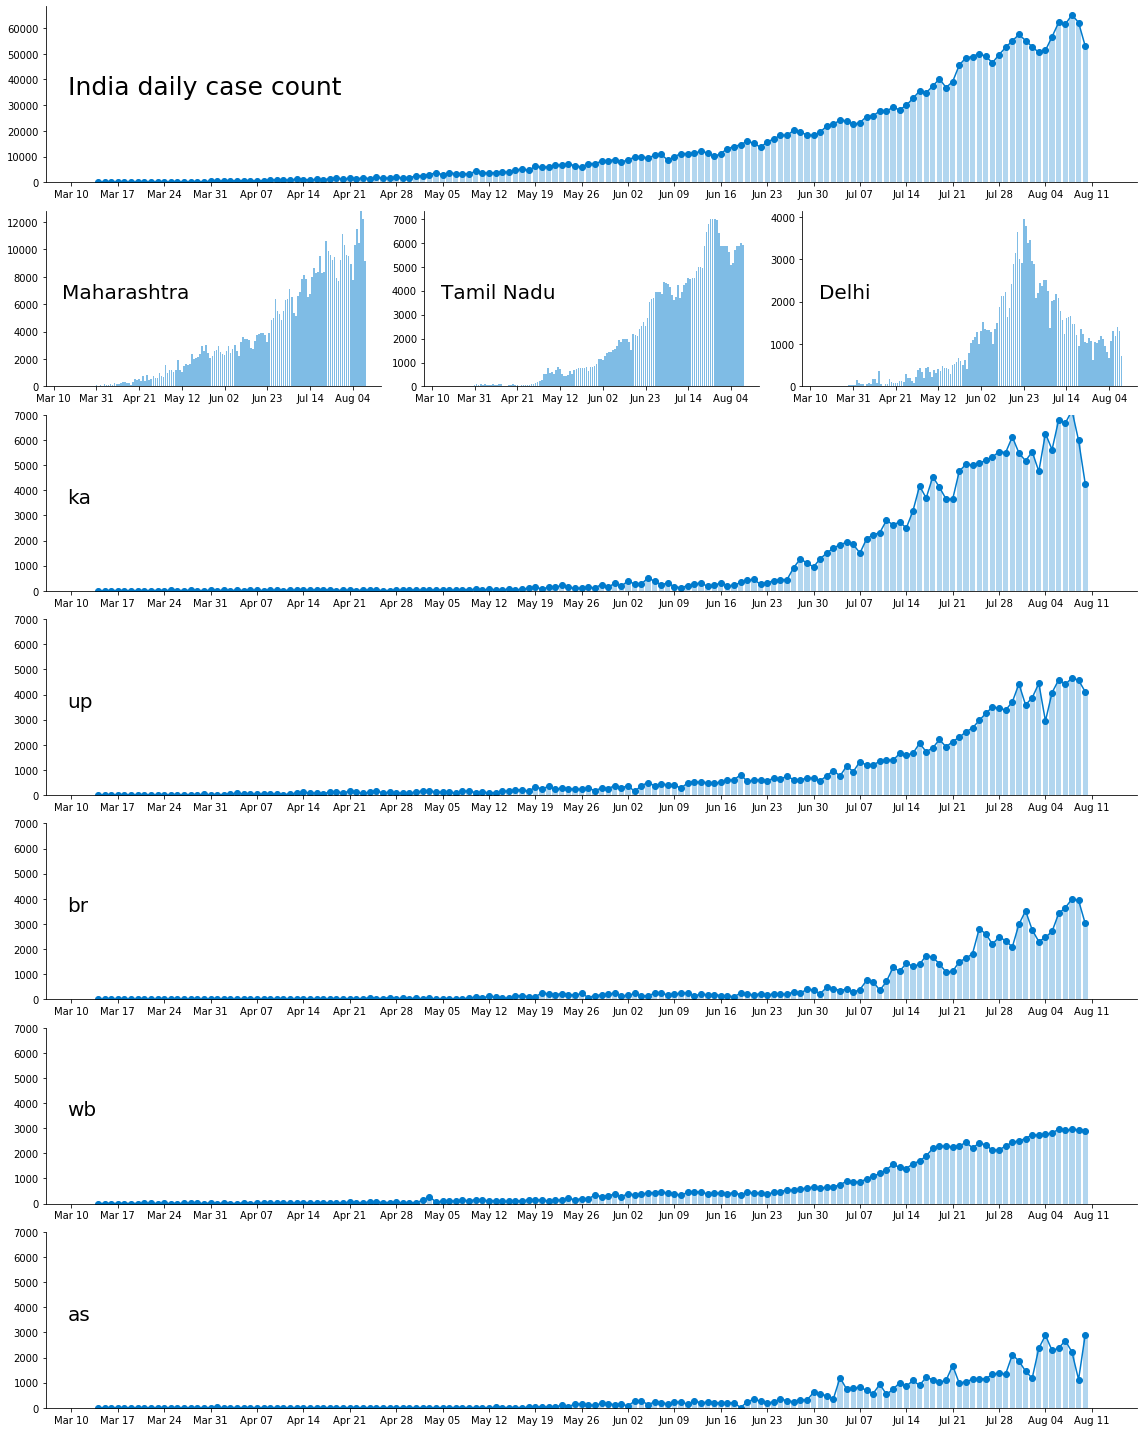

In [31]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['mh'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.mh,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.mh.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['tn'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['tn'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['dl'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.dl,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [32]:
#hide_input
print(df_table.to_string(index=False))

states   Cases  Deaths  PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
    mh  524513   18049  515332    17756       9181         293           3.44
    tn  302815    5041  296901     4927       5914         114           1.66
    ap  235525    2116  227860     2036       7665          80           0.90
    ka  182354    3319  178087     3205       4267         114           1.82
    dl  146134    4131  145427     4111        707          20           2.83
    up  126722    2120  122609     2069       4113          51           1.67
    wb   98459    2100   95554     2059       2905          41           2.13
    br   82741     450   79720      429       3021          21           0.54
    tg   80751     637   79495      627       1256          10           0.79
    gj   72120    2673   71064     2653       1056          20           3.71
    as   61636     155   58736      149       2900           6           0.25
    rj   53670     800   52497      789       1173          11  

{% bibliography --cited %}

In [33]:
#hide
### END NOTES
# - json data is download from covid19india.org and manipulated to create a dataframe similar to existing one.
# - Github actions are setup to run the code and build the blog post everyday
#    -Files Edited
#        - UnivAI-FastBlogs/.github/workflows/update-nb.yaml
#        - UnivAI-FastBlogs/_notebooks/requirements.txt
#        - UnivAI-FastBlogs/_action_files/run_notebooks.sh
# - Citations were added using BibTeX and jekyll-scholar
#    -Files Edited
#        - UnivAI-FastBlogs/_bibliography/references.bib
#        - UnivAI-FastBlogs/_config.yml
#        - UnivAI-FastBlogs/Gemfile/